In [1]:
import time
import datetime
import json
import requests 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np
import copy
import os
import collections
from datetime import date, timedelta


In [2]:
related_files = os.listdir('/home/pbashiri/crypto/scripts/data/related/')

In [3]:
related_files = [
    'related_submissions.json']

In [4]:
def drop_weekend_items(ts):
    ts_no_weekend = ts.copy()
    for k in ts:
        if k.weekday() > 4:
            del ts_no_weekend[k]
            
    return ts_no_weekend

In [5]:
def normalize_dict(ts):
        dic = dict()
        arr = np.array(list(ts.values()))
        max_value = arr.max()
        min_value = arr.min()
        
        for k,v in ts.items():
            value = (v - min_value) / (max_value - min_value)
            dic[k] = value
        return dic

In [6]:
def plot_ts(tss, 
            title,
            max_yticks=None,
            normalize=False,
            shorten=False, 
            drop_weekends=False,
            start_date = datetime.datetime.strptime('2018-06-01', "%Y-%m-%d").date(),
            end_date = datetime.datetime.strptime('2018-09-01', "%Y-%m-%d").date()
           ):
    
    ts_ordered = dict()
    ts_o_shortened = dict()
    ts_o_s_nor = dict()
    ts_final_d = dict()
    
    for k, ts in tss.items():
        ts_ordered[k] = collections.OrderedDict(sorted(ts.items()))
    
    if shorten:
        for k, ts_o in ts_ordered.items():
            ts_o = {k:v for k,v in ts_o.items() if k> start_date and k < end_date}
            ts_o_shortened[k] = ts_o
    else:
        ts_o_shortened = ts_ordered

    if normalize:
        for k,ts_o_s in ts_o_shortened.items():
            ts_o_s = normalize_dict(ts_o_s)
            ts_o_s_nor[k] = ts_o_s
    else:
        ts_o_s_nor = ts_o_shortened
        
    if drop_weekends:
        for k,ts_o_s_w in ts_o_s_nor.items():
            dropped = drop_weekend_items(ts_o_s_w)
            ts_final_d[k] = dropped            
    else:
        ts_final_d = ts_o_s_nor
        
    fig, ax = plt.subplots(figsize=(20,10))

    for k, v in ts_final_d.items():
        plt.plot(v.keys(), v.values(), '.-', label=k)

    plt.title(title)
    format_xdata = mdates.DateFormatter('%m-%d')
    
    if max_yticks is not None:
        #max_yticks = int((end_date - start_date).days)
        xloc = plt.MaxNLocator(max_yticks)
        ax.xaxis.set_major_locator(xloc)            
    
    ax.xaxis.set_major_formatter(format_xdata)
    #ax.set_ylim(ymin=0)
    plt.legend()

    plt.show()

In [7]:
def add_zeros_to_ts(ts, start_date, end_date):
    delta = end_date - start_date       # as timedelta
    ts_filled = ts.copy()

    for i in range(delta.days + 1):
        day = start_date + timedelta(days=i)
        
        if day not in ts.keys():
            ts_filled[day] = 0

    return ts_filled

In [8]:
def get_timeseries_from_submission_file (path, filename):
    start_time = time.time()
    print("Started working on " + str(filename) + " at " + str(datetime.datetime.now()) )
    
    submission_time_series = dict()
    
    with open(path + filename, 'r') as json_file:
        for i,line in enumerate(json_file):
            dic_items = json.loads(line)
            
            for item in dic_items:
                created_utc = int(dic_items[item]['created_utc'])
                dt_object = datetime.datetime.fromtimestamp(created_utc)
                date = dt_object.date()
                
                if date in submission_time_series:
                    submission_time_series[date] += 1
                else:
                    submission_time_series[date] = 1
                        
    print("Finished at " + str(datetime.datetime.now()))
    print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))
    
    return submission_time_series

In [9]:
def get_timeseries_from_comment_file (path, filename):
    start_time = time.time()
    print("Started working on " + str(filename) + " at " + str(datetime.datetime.now()) )
    
    comment_time_series = dict()
    
    with open(path + filename, 'r') as json_file:
        for i,line in enumerate(json_file):
            dic_items = json.loads(line)
            
            for item in dic_items:
                created_utc = int(dic_items[item]['created_utc'])
                dt_object = datetime.datetime.fromtimestamp(created_utc)
                date = dt_object.date()
                
                if date in submission_time_series:
                    comment_time_series[date] += 1
                else:
                    comment_time_series[date] = 1

    print("Finished at " + str(datetime.datetime.now()))
    print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))
    
    return comment_time_series

In [10]:
## Keep for versioning

import json
import time
import datetime

start_time = time.time()
print("Starting at " + str(datetime.datetime.now()))

submission_time_series = dict()
comment_time_series = dict()

for file in related_files:
    print("\tStarted working on " + str(file) + " at " + str(datetime.datetime.now()) )
    with open('/home/pbashiri/crypto/scripts/data/related/' + file, 'r') as json_file:
        for i,line in enumerate(json_file):
            dic_items = json.loads(line)
            
            for item in dic_items:
                created_utc = int(dic_items[item]['created_utc'])
                dt_object = datetime.datetime.fromtimestamp(created_utc)
                date = dt_object.date()
                
                if 'submissions' in file:
                    if date in submission_time_series:
                        submission_time_series[date] += 1
                    else:
                        submission_time_series[date] = 1
                        
                if 'comments' in file:
                    if date in submission_time_series:
                        comment_time_series[date] += 1
                    else:
                        comment_time_series[date] = 1
                        
print("Finished at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-12-12 18:18:50.650106
	Started working on related_submissions.json at 2019-12-12 18:18:50.650676
Finished at 2019-12-12 18:19:13.881825
Total time: --- 23.2326 seconds ---


In [11]:
submission_time_series_sort = collections.OrderedDict(sorted(submission_time_series.items()))

In [15]:
submission_time_series_sort

OrderedDict([(datetime.date(2018, 5, 31), 498),
             (datetime.date(2018, 6, 1), 2549),
             (datetime.date(2018, 6, 2), 2209),
             (datetime.date(2018, 6, 3), 2328),
             (datetime.date(2018, 6, 4), 2497),
             (datetime.date(2018, 6, 5), 2745),
             (datetime.date(2018, 6, 6), 2636),
             (datetime.date(2018, 6, 7), 2514),
             (datetime.date(2018, 6, 8), 2563),
             (datetime.date(2018, 6, 9), 1996),
             (datetime.date(2018, 6, 10), 2163),
             (datetime.date(2018, 6, 11), 2497),
             (datetime.date(2018, 6, 12), 2426),
             (datetime.date(2018, 6, 13), 2554),
             (datetime.date(2018, 6, 14), 2295),
             (datetime.date(2018, 6, 15), 2362),
             (datetime.date(2018, 6, 16), 1916),
             (datetime.date(2018, 6, 17), 1934),
             (datetime.date(2018, 6, 18), 2314),
             (datetime.date(2018, 6, 19), 2298),
             (datetime.date(20

In [12]:
start = datetime.datetime.strptime('2018-06-01', "%Y-%m-%d").date()
end = datetime.datetime.strptime('2018-09-01', "%Y-%m-%d").date()

In [16]:
short_sorted_ts = {k:v for k,v in submission_time_series_sort.items() if k> start and k < end}

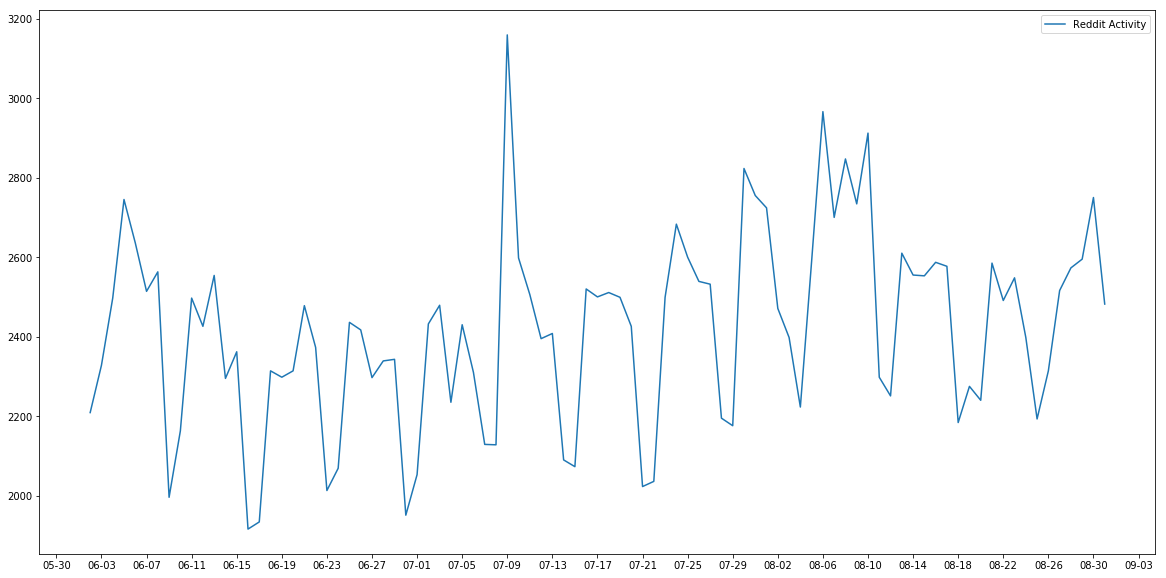

In [17]:
##plt all timeseries means in one chart
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(short_sorted_ts.keys(), short_sorted_ts.values(), label='Reddit Activity')

format_xdata = mdates.DateFormatter('%m-%d')
max_yticks = 30
xloc = plt.MaxNLocator(max_yticks)
ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(format_xdata)
#ax.set_ylim(ymin=0)
plt.legend()

plt.show()

### Important Stuff

In [18]:
ts_r = get_timeseries_from_submission_file('/home/pbashiri/crypto/scripts/data/related/', 
                                         'related_submissions.json')

Started working on related_submissions.json at 2019-12-12 18:32:48.159339
Finished at 2019-12-12 18:32:55.686549
Total time: --- 7.5278 seconds ---


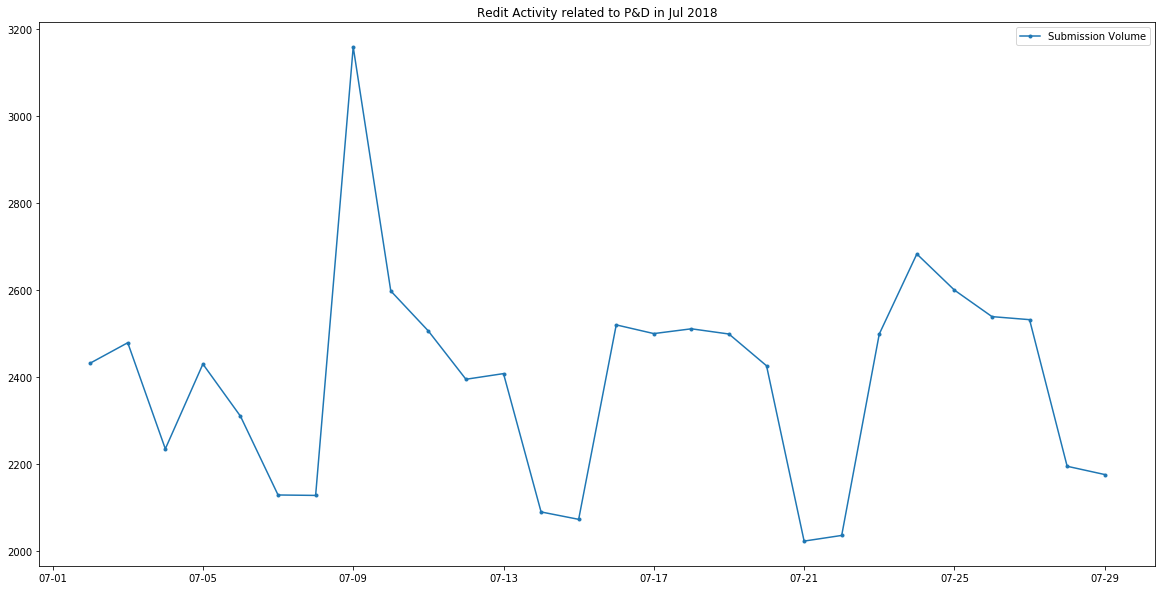

In [22]:
plot_ts({'Submission Volume' : ts_r},
        'Redit Activity related to P&D in Jul 2018',
        shorten=True,
        start_date = datetime.datetime.strptime('2018-07-01', "%Y-%m-%d").date(),
        end_date = datetime.datetime.strptime('2018-07-30', "%Y-%m-%d").date()
       )

In [54]:
ts = get_timeseries_from_submission_file('/home/pbashiri/crypto/scripts/data/light_dict_json/', 
                                         'submissions_2018-07.json')

Started working on submissions_2018-07.json at 2019-11-20 19:10:58.648656
Finished at 2019-11-20 19:14:01.114380
Total time: --- 182.4667 seconds ---


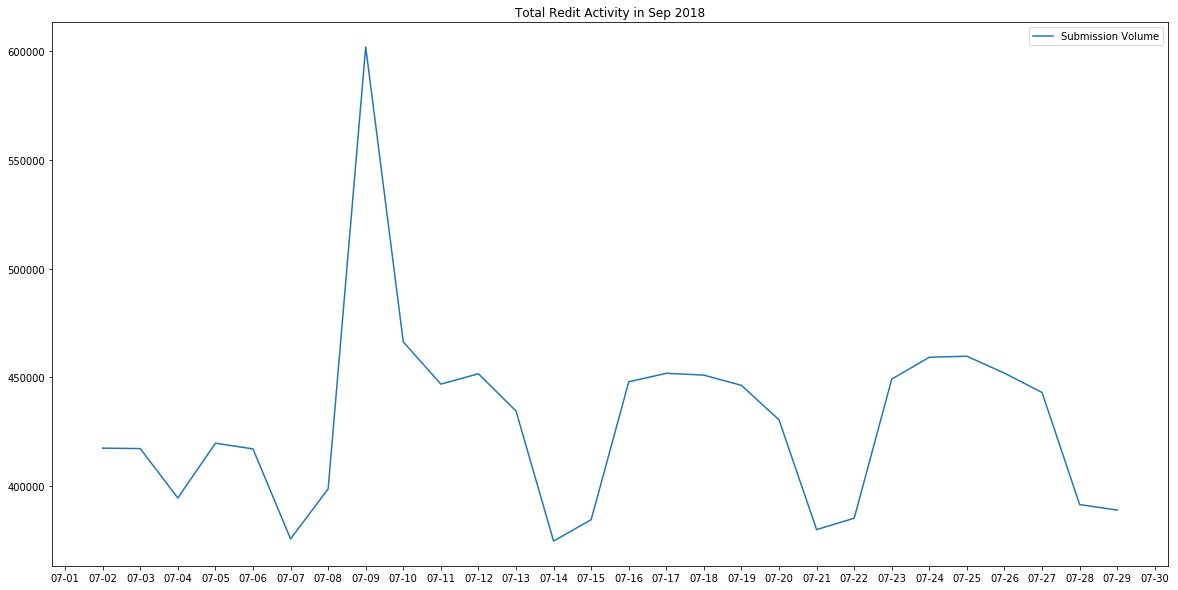

In [73]:
plot_ts({'Submission Volume' : ts},
        'Total Redit Activity in Sep 2018',
        shorten=True,
        start_date = datetime.datetime.strptime('2018-07-01', "%Y-%m-%d").date(),
        end_date = datetime.datetime.strptime('2018-07-30', "%Y-%m-%d").date()
       )

In [59]:
ts_r_short = get_timeseries_from_submission_file('/home/pbashiri/crypto/scripts/data/related/', 
                                         'related_submissions_shorter_2019_07_07.json')

Started working on related_submissions_shorter_2019_07_07.json at 2019-11-21 11:44:44.064252
Finished at 2019-11-21 11:44:44.713504
Total time: --- 0.6494 seconds ---


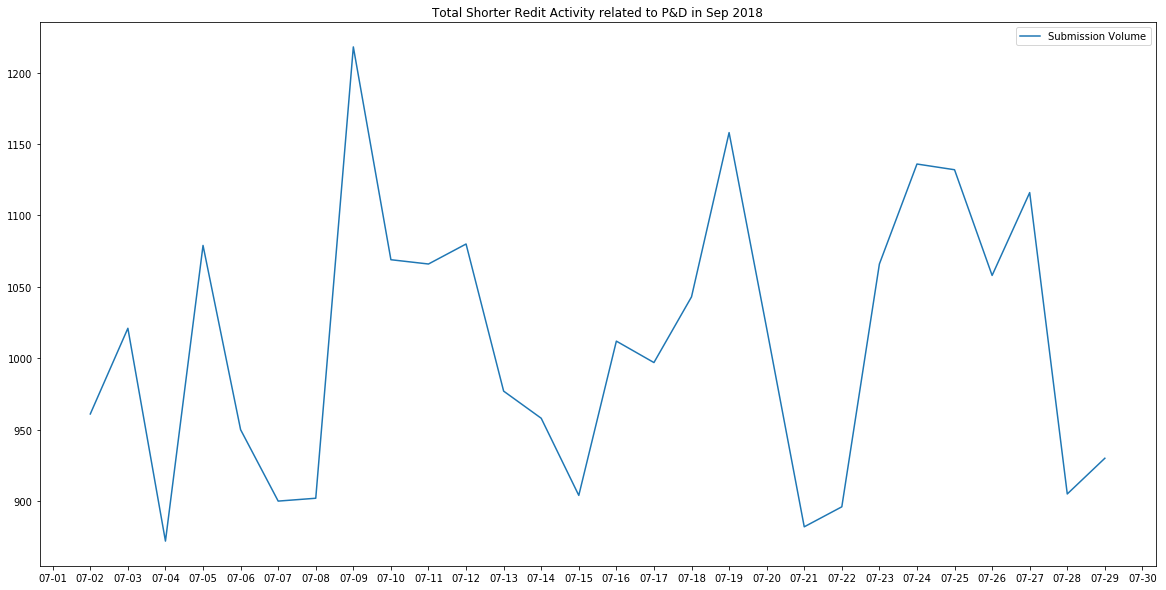

In [72]:
plot_ts({'Submission Volume':ts_r_short},
        'Total Shorter Redit Activity related to P&D in Sep 2018',
        shorten=True,
        start_date = datetime.datetime.strptime('2018-07-01', "%Y-%m-%d").date(),
        end_date = datetime.datetime.strptime('2018-07-30', "%Y-%m-%d").date()
       )

In [61]:
ts_r_short_2 = get_timeseries_from_submission_file('/home/pbashiri/crypto/scripts/data/related/', 
                                         'related_submissions_shorter_2_2019_07.json')

Started working on related_submissions_shorter_2_2019_07.json at 2019-11-21 11:54:48.954571
Finished at 2019-11-21 11:54:49.076486
Total time: --- 0.1221 seconds ---


In [152]:
s = mean(ts_r_short_2.values())

NameError: name 'mean' is not defined

In [151]:
s

4248

In [104]:
ts_r_short_2

{datetime.date(2018, 6, 30): 9,
 datetime.date(2018, 7, 1): 103,
 datetime.date(2018, 7, 2): 156,
 datetime.date(2018, 7, 3): 143,
 datetime.date(2018, 7, 4): 155,
 datetime.date(2018, 7, 5): 157,
 datetime.date(2018, 7, 6): 133,
 datetime.date(2018, 7, 7): 110,
 datetime.date(2018, 7, 8): 126,
 datetime.date(2018, 7, 9): 160,
 datetime.date(2018, 7, 10): 144,
 datetime.date(2018, 7, 11): 179,
 datetime.date(2018, 7, 12): 160,
 datetime.date(2018, 7, 13): 137,
 datetime.date(2018, 7, 14): 107,
 datetime.date(2018, 7, 15): 123,
 datetime.date(2018, 7, 16): 139,
 datetime.date(2018, 7, 17): 150,
 datetime.date(2018, 7, 18): 153,
 datetime.date(2018, 7, 19): 111,
 datetime.date(2018, 7, 20): 132,
 datetime.date(2018, 7, 21): 99,
 datetime.date(2018, 7, 22): 136,
 datetime.date(2018, 7, 23): 145,
 datetime.date(2018, 7, 24): 164,
 datetime.date(2018, 7, 25): 177,
 datetime.date(2018, 7, 26): 133,
 datetime.date(2018, 7, 27): 119,
 datetime.date(2018, 7, 28): 118,
 datetime.date(2018, 7, 29

28
20


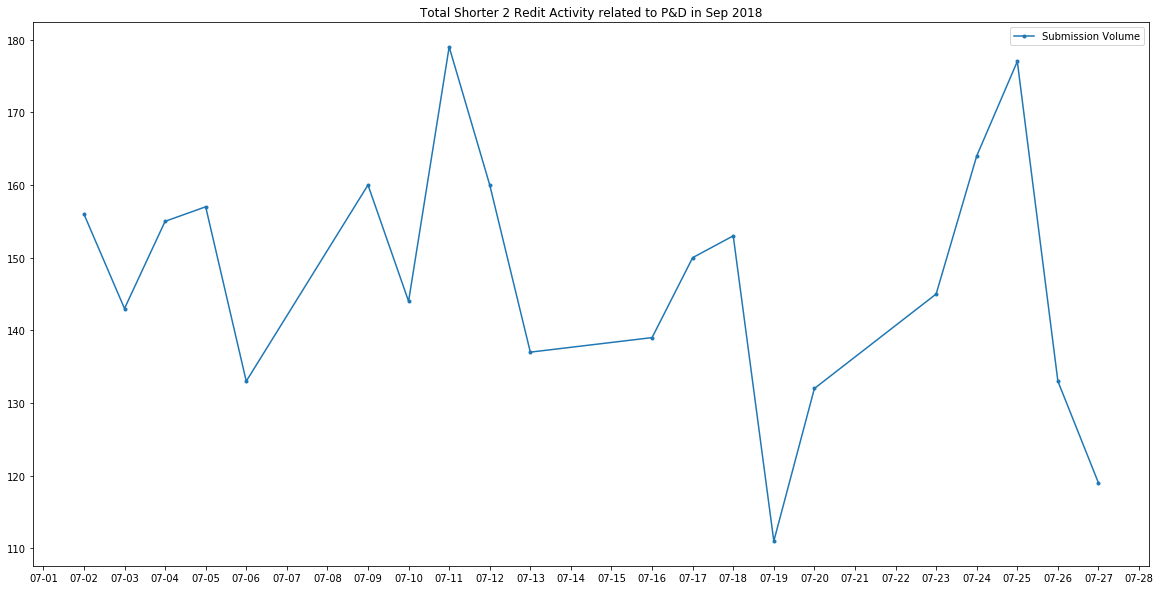

In [144]:
plot_ts({'Submission Volume' :ts_r_short_2},
        'Total Shorter 2 Redit Activity related to P&D in Sep 2018',
        shorten=True,
        drop_weekends=True,
        max_yticks=30,
        start_date = datetime.datetime.strptime('2018-07-01', "%Y-%m-%d").date(),
        end_date = datetime.datetime.strptime('2018-07-30', "%Y-%m-%d").date()
       )

In [138]:
time_series = {
    'Overall Reddit Activity': ts,
    'Related Activity(large kw list)': ts_r,
    'Related Activity(short kw list)': ts_r_short,
    'Related Activity(shorter kw list)': ts_r_short_2
}

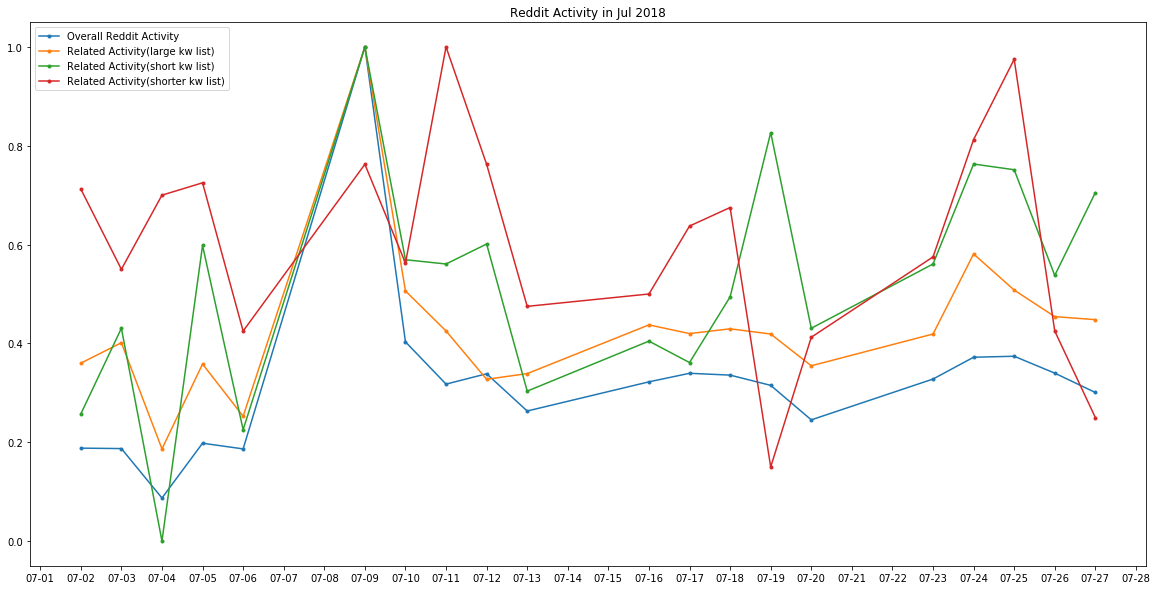

In [134]:
plot_ts(time_series,
    'Reddit Activity in Jul 2018',
        normalize=True,
    shorten=True,
        drop_weekends=True,
        max_yticks=30,
    start_date = datetime.datetime.strptime('2018-07-01', "%Y-%m-%d").date(),
    end_date = datetime.datetime.strptime('2018-07-30', "%Y-%m-%d").date()
   )